# Support Vector Machines

In basic terms, if you were to look at a scatterplot split into two classes (we'll say these classes are colour coded), then the vector is a hyperplane between these two points and the supports are equidistant extra lines on each side that intercept two data points, thus 'supporting' the hyperplane's separation.

In [41]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC # Does not rely on kernel trick

In [42]:
iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2)

## Linear Kernel

To begin, kernels involve *inner products*: $\langle x_i, x_{i'} \rangle = \sum_{j=1}^{p}x_{ij}x_{i'j}$

With this in mind, linear kernels can be represented as: $f(x) = \beta_0 + \sum_{i=1}^{p}\alpha_i\langle x, x_i \rangle$, where there are $n$ parameters $\alpha_i$, $i = 1,...,n$ with one per training observation.

Using a hyperplane and maximal margins to find a best fitting split of data

In [43]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [44]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [45]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

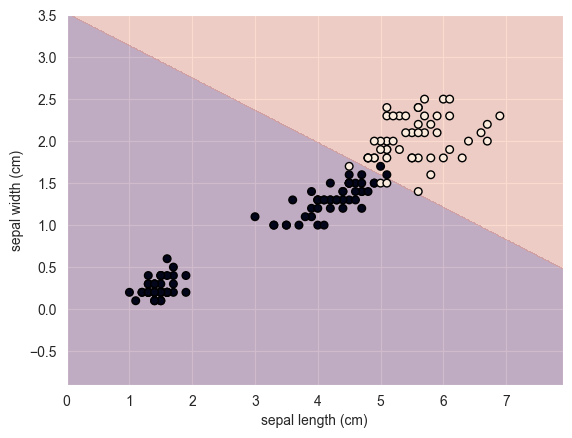

In [46]:
import matplotlib.pyplot as plt
import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [47]:
from sklearn.svm import SVC

scaler = StandardScaler()
X = scaler.fit_transform(X)

clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X, y)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


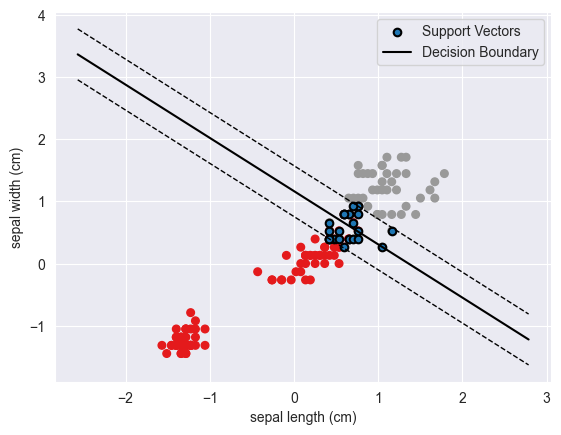

In [48]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Set1) # Plotting datapoints for sepal length and width
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30, facecolors=None, edgecolors='k', label='Support Vectors', linewidths=1.5)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

w = clf.coef_[0]
b = clf.intercept_[0]
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_vals = -(w[0] / w[1]) * x_vals - b / w[1] # This is derived from w0x0 + w1x1 + b = 0 => x1 = -(w0 / w1) * x0 - b / w1
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

margin = 1 / np.linalg.norm(w) # In reality, the mathematical formula is 1 / ||w||
y_vals_down = y_vals - np.sqrt(1 + (w[0]/w[1])**2) * margin
y_vals_up = y_vals + np.sqrt(1 + (w[0]/w[1])**2) * margin
plt.plot(x_vals, y_vals_down, 'k--', linewidth=1)
plt.plot(x_vals, y_vals_up, 'k--', linewidth=1)

plt.legend()

## Polynomial Kernel

$K(x_i, x_{i'}) = (1 + \sum_{j=1}^{p}x_{ij}x_{i'j})^d \implies f(x) = \beta_0 + \sum_{i \in S}\alpha_i K(x, x_i)$

If observations that belong to two classes cannot be linearly separated by a hyperplane and margins, then it may not be desirable to use a linear kernel.

In [49]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, random_state=42, noise=0.15)

polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C=10, max_iter=10_000, random_state=42))

polynomial_svm_clf.fit(X, y)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


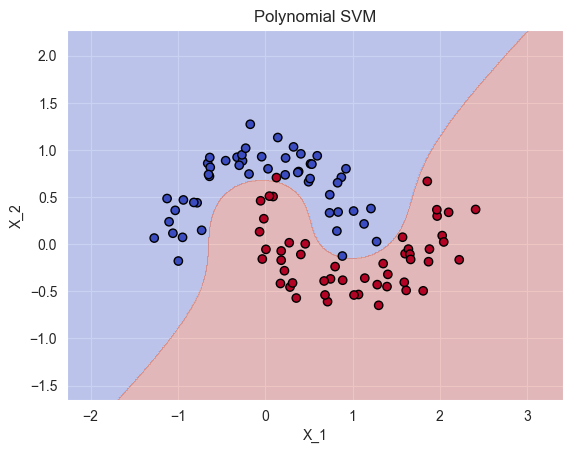

In [50]:
# Similar plotting to first plot

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Polynomial SVM')
plt.show()

In [53]:
from sklearn.svm import SVC

# More freedom for choosing C (number of violations to margin/hyperplane), degree, and initial coef.
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', C=5, degree=10, coef0=100, random_state=42))
poly_kernel_svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,10
,gamma,'scale'


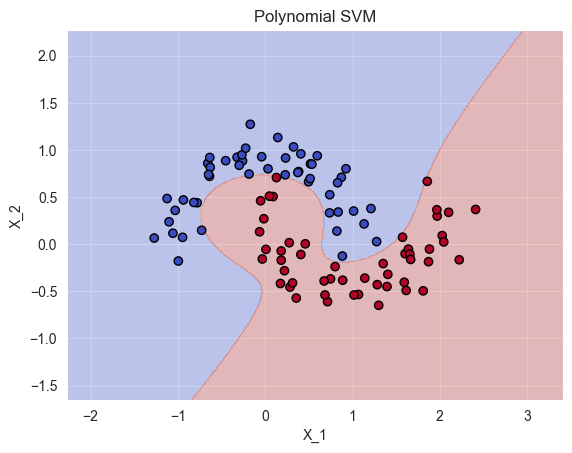

In [54]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Polynomial SVM')
plt.show()

## Gaussian RBF / Radial Kernel

$K(x_i, x_{i'}) = exp(-\gamma\sum_{j=1}^{p}(x_{ij} - x_{i'j})^2)$

Rather than splitting via hyperplanes, this attempts to split by capturing

Can be more computationally expensive than the previous two

In [57]:
# Experiment with different gammas

rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=0.001, gamma=2))
rbf_kernel_svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,0.001
,kernel,'rbf'
,degree,3
,gamma,2


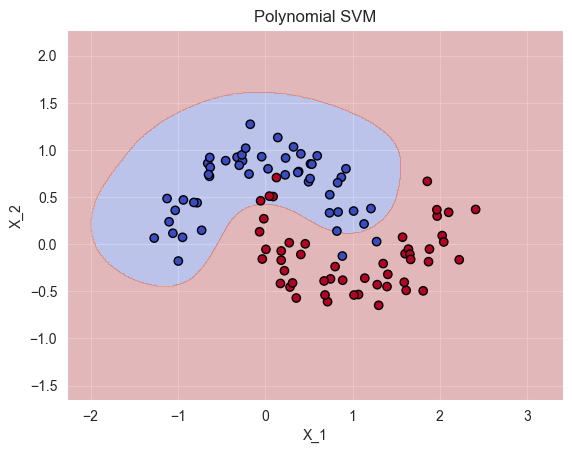

In [58]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Polynomial SVM')
plt.show()